# Tiff working on code

My part is figuring out how to add nodes and edges from one stop to another.

Firstly, we need a list of stops that we want to have, and their locations. 

Next, we need a function that will calculate the distances between two stops (since we want edges connecting from the current node to the two closest neighbors)

After we have the function that will calculate the distances between a stop and all other stops and stores that result into a list, we must initialize the empty DiGraph.




['Place 1', 'Place 2', 'Place 3']


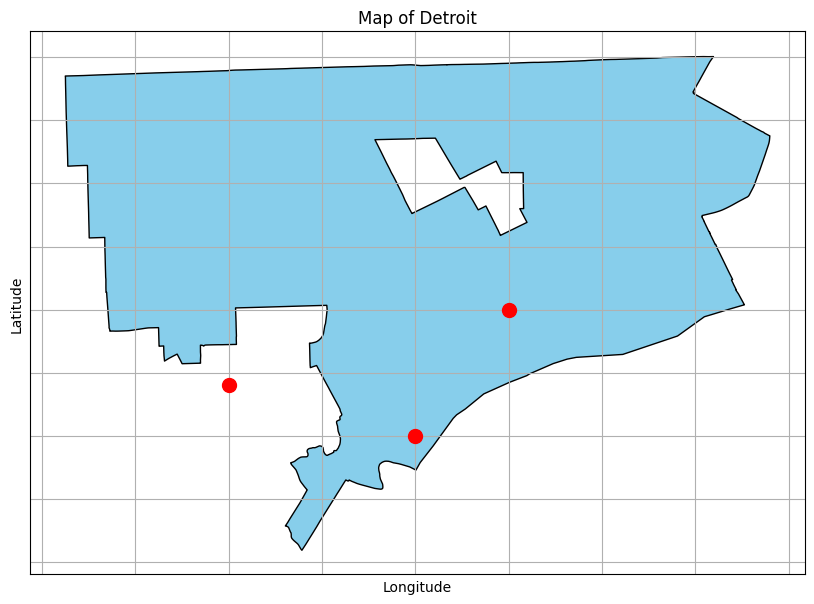

In [11]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt


def calculate_distance(point, list_point):
    # Initialize an empty list for place, and distance
    list_dist = []
    
    x1, y1 = point
    #Checks the distance for each point in list_point
    for point2 in list_point:
        x2, y2 = point2
        
        # Check that Point is not the same as point 2 
        if point != point2:
            
            # Calcualte distance
            dist = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
            # Creates a list of places and their distances from reference point
            list_dist.append((point2, dist)) 
            
            # Function adapted form stackoverflow (Q: How can you sort a list of tuples by the second item?)
    return sorted(list_dist, key=lambda x: x[1])


def plot_nodes_on_map(detroit_shapefile, places_dict):

    # Reads the shapefile
    detroit = gpd.read_file(detroit_shapefile)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the shapefile
    detroit.plot(ax=ax, color='skyblue', edgecolor='black')

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes at specified coordinates
    for place, coords in places_dict.items():
        # Add node to the graph
        G.add_node(place, pos=coords)

    print(G.nodes)

    # Draw nodes 
    nx.draw_networkx_nodes(G, pos=places_dict, node_size=100, ax=ax, node_color='red')

    # Set title, labels, and grid
    plt.title('Map of Detroit')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)

    # Display the plot
    plt.show()

# Example 
places_coordinates = {
    "Place 1": (-83.05, 42.35),
    "Place 2": (-83.10, 42.30),
    "Place 3":(-83.20, 42.32)
}

# Path to shapefile
detroit_shapefile = 'City_of_Detroit_Boundary.shp'

#Call function
plot_nodes_on_map(detroit_shapefile, places_coordinates)


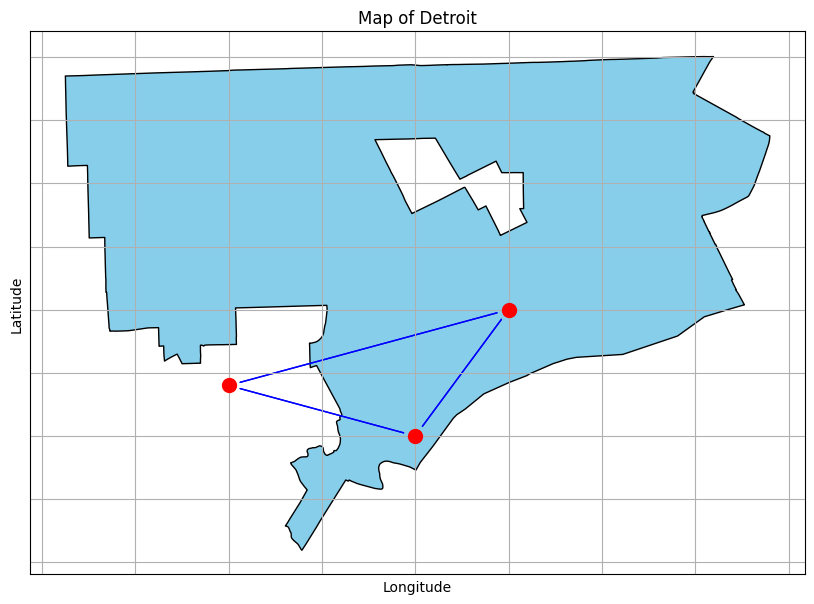

In [45]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

# Calculates the distance between two points
def distance(coord1, coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5


# Returns a dictionary of closest to farthest neighbors
def closest_neighbors(places_dict, target_point):

    # Initialize an empty dictionary 
    distances = {}
    
    for location, coord in places_dict.items():

        # Check that we are not comparing two of the same points
        if coord != target_point:
            
            # The location as a key and its distance as the value.
            distances[location] = distance(coord, target_point)

    # Sort distances from closest to farthest
    sorted_distances = sorted(distances.items(), key=lambda x: x[1])
    
    return sorted_distances

def nodes_edges(detroit_shapefile, places_dict):

    # Reads the shapefile
    detroit = gpd.read_file(detroit_shapefile)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the shapefile
    detroit.plot(ax=ax, color='skyblue', edgecolor='black')

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes at specified coordinates
    for place, coords in places_dict.items():
        # Add node to the graph
        G.add_node(place, pos=coords)

    # Call the distance function to get a list of distances 
    for place, coords in places_dict.items():
        
        dist = closest_neighbors(places_dict, coords)
        
        closest1 = dist[0][0] # Name of the closest neighbor
        closest2 = dist[1][0] # Name of the second closest neighbor

        # Add edges to the two closest neighbors
        G.add_edge(place, closest1) 
        G.add_edge(place, closest2)

    # Draw nodes 
    nx.draw_networkx_nodes(G, pos=places_dict, node_size=100, ax=ax, node_color='red')

    # Draw edges 
    nx.draw_networkx_edges(G, pos=places_dict, ax=ax, edge_color='blue', arrowstyle='-')

    # Set title, labels, and grid
    plt.title('Map of Detroit')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)

    # Display the plot
    plt.show()

# Example of places and their coordinates
places_coordinates = {
    "Place 1": (-83.05, 42.35),
    "Place 2": (-83.10, 42.30),
    "Place 3":(-83.20, 42.32)
}

# Path to shapefile
detroit_shapefile = 'City_of_Detroit_Boundary.shp'

#Call the function
nodes_edges(detroit_shapefile, places_coordinates)
